In [22]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [23]:
# Load the dataset
data = pd.read_csv('ilpd_data.csv')


In [24]:
# Preprocess the Data
# Convert GENDER to numerical values (0 for Male, 1 for Female)
data['GENDER'] = data['GENDER'].map({'Male': 0, 'Female': 1})

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Separate features (X) from target variable (y)
X = data.drop(columns=['SELECTOR'])  # Features only


In [25]:
# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Apply PCA
pca = PCA(n_components=X.shape[1])  # Use all features
X_pca = pca.fit_transform(X_scaled)


In [27]:
# Evaluate Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)


Explained Variance Ratio: [0.27310255 0.2000018  0.14181701 0.10487349 0.09162376 0.08179022
 0.06717541 0.0208978  0.01315037 0.00556758]
Cumulative Explained Variance: [0.27310255 0.47310435 0.61492136 0.71979485 0.81141861 0.89320883
 0.96038424 0.98128204 0.99443242 1.        ]


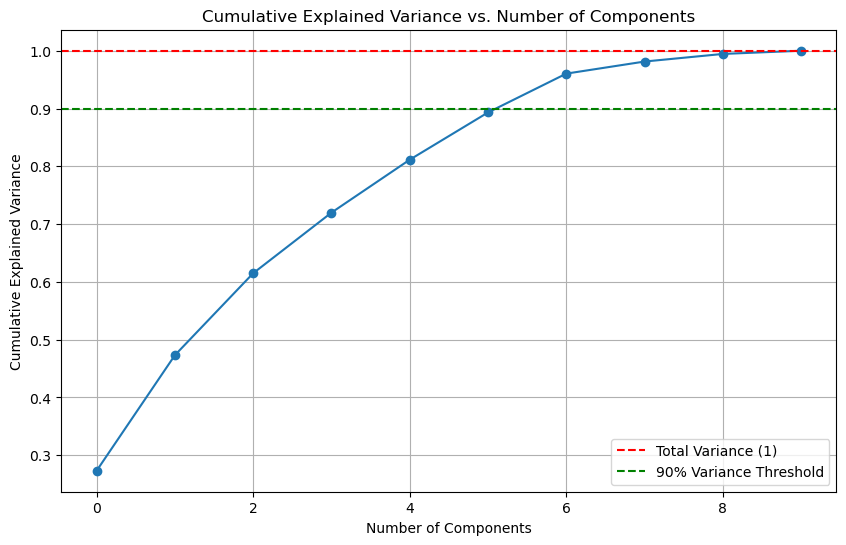

In [28]:
# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=1, color='r', linestyle='--', label='Total Variance (1)')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()


In [29]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance (e.g., below a threshold)
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_reduced = selector.fit_transform(X_scaled)


In [30]:
pca = PCA(n_components=X_reduced.shape[1])  # Use reduced features if applicable
X_pca = pca.fit_transform(X_reduced)


In [31]:
# Evaluate Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)


Explained Variance Ratio: [0.27310255 0.2000018  0.14181701 0.10487349 0.09162376 0.08179022
 0.06717541 0.0208978  0.01315037 0.00556758]
Cumulative Explained Variance: [0.27310255 0.47310435 0.61492136 0.71979485 0.81141861 0.89320883
 0.96038424 0.98128204 0.99443242 1.        ]


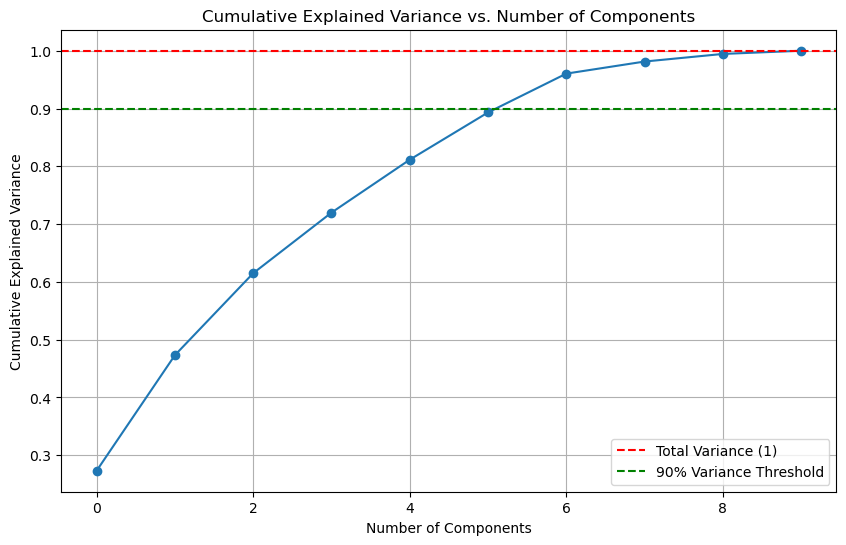

In [32]:
# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=1, color='r', linestyle='--', label='Total Variance (1)')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

In [33]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(kernel='rbf', n_components=X.shape[1])  # Use RBF kernel for non-linear data
X_pca = kpca.fit_transform(X_scaled)


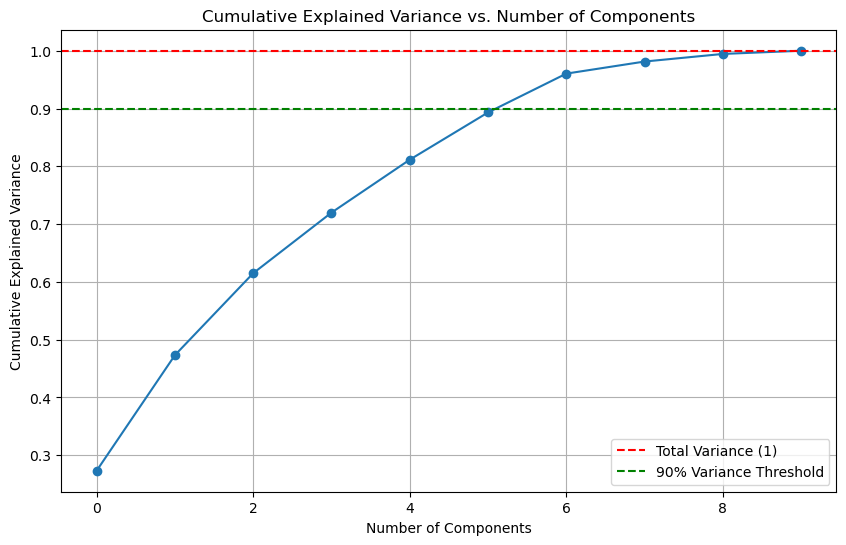

In [35]:
# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.axhline(y=1, color='r', linestyle='--', label='Total Variance (1)')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()